# Аналитик рынка. Тестовое задание

__Перед вами стоят исследовательские задачи:__

* Определить на открытых данных (статистика, результаты исследований, и проч. ), сколько компаний в сфере IT существует и работает в стране (напр., в Бразилии); представить необходимые данные, сформулировать заключение
* Определить на открытых данных (статистика, результаты исследований, и проч.), сколько специалистов в сфере IT существует и работает в той же стране (напр., в Бразилии); представить необходимые данные, сформулировать аналитическое заключение
* Определить на открытых данных (статистика, результаты исследований, и проч.), растёт или падает IT-рынок той же стране (напр., в Бразилии); представить необходимые данные, сформулировать аналитическое заключение
* Определить на открытых данных (статистика, результаты исследований, и проч. ), какова актуальная средняя ЗП IT-специалиста, актуальные средние ЗП IT-специалистов разного профиля в той же стране (напр., в Бразилии); представить необходимые данные, сформулировать аналитическое заключение

__Что надо сделать в тестовом задании:__

* Опишите ваш алгоритм действий решению этих задач (по поиску, отбору репрезентативных данных, критерии отбора, и т.д.)
* Какие профессиональные инструменты, софт вы будете использовать на разных этапах и чем они вам полезны

## Алгоритм действий

 Поскольку подготовка и обработка данных занимает большую часть времени исследования, я решил сначала поискать готовые датасеты на сайте Kaggle.com - социальная сеть специалистов по обработке данных и машинному обучению. Зачастую там находятся предобработанные датасеты для дальнейшего исследования. 
 
 Там я нашел датасет с информацией о зарплате IT-специалистов в Германии. Я выбрал именно его, потому что на первый взгляд он показался актуальным и подтверждался ссылками на исследование, в рамках которого была собрана информация.
 
 Далее я стал искать уже информацию о рынке IT в Германии. На сайте Федерального Бюро Статистики Германии я нашел ссылку на исследование, проведенное немецкой цифровой ассоциацией Bitkom. 
 
 Так же мною были использованы данные с сайта statista.com, которые ссылались на Bitkom.
 
Рынок ICT (Information & Telecommunication Technologies) в Германии включает в себя так же коммуникационные и аппаратные технологии. Для упрощения я проанализировать только программные продукты (software).

Работа была выполнена в Jupyter Notebook c использованием библиотек pandas для анализа данных и seaborn и matplotlib для визуализации.

## Источники данных

_Количество компаний:_
* https://www.bitkom.org/sites/default/files/2021-05/anzahl_itk_unternehmen_2019.pdf
* https://www.statista.com/statistics/462234/it-industry-number-of-companies-germany/

_Количество специалистов:_
* https://www.statista.com/statistics/795244/employment-in-germany/
* https://www.statista.com/statistics/480521/ict-employees-by-sector-germany/

_Объем рынка:_
* https://www.trade.gov/country-commercial-guides/germany-information-and-communications-technology-ict
* https://www.linkedin.com/pulse/market-germany-key-facts-figures-marat-yakupov/


_Kaggle и исследование по зарплатам:_

* https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
* https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region



## Количество компаний в сфере IT

In [1]:
#импорт библиотек
import pandas as pd
import seaborn as sns

Создам таблицу с информацией о количестве компаний, росте и визуализирую данные.

In [2]:
#создание датафрейма с информацией о количестве компаний по годам
number_of_companies = pd.DataFrame({'year':list(range(2008, 2020)), 'num_of_companies':[
    70723, 72208, 74141, 78469, 80490, 81932, 83825, 85779, 88101, 90331, 92735, 94267]})

#рост в процентах по сравнению с предыдущим годом
number_of_companies['change_in_proc'] = (number_of_companies['num_of_companies'].pct_change()*100).round(2)

number_of_companies.set_index('year')

,num_of_companies,change_in_proc
year,,
2008,70723,NaN
2009,72208,2.10
2010,74141,2.68
2011,78469,5.84
2012,80490,2.58
2013,81932,1.79
2014,83825,2.31
2015,85779,2.33
2016,88101,2.71


[(0.0, 110000.0)]

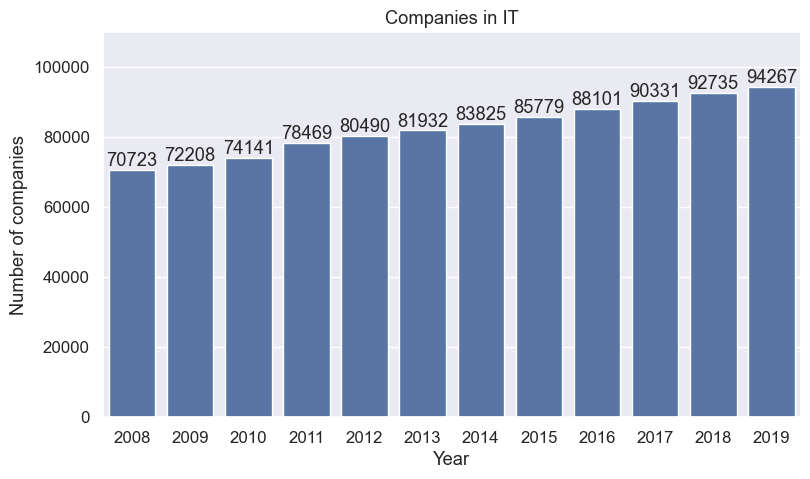

In [3]:
#график количество компаний/год
sns.set_palette('pastel', color_codes=True)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(9,5)})
sns.set(font_scale=1.1)
ax=sns.barplot(data=number_of_companies, x='year', y='num_of_companies', color='b')
ax.set(xlabel='Year', ylabel='Number of companies', title='Companies in IT')
ax.bar_label(ax.containers[0])
ax.set(ylim=(0, 1.1e5))

In [4]:
print('Средний рост количества компаний в год:',round(number_of_companies['change_in_proc'].mean(), 2),"%")

Средний рост количества компаний в год: 2.65 %


### Выводы:

* в 2019 году в Германии было более 90 тысяч компаний в сфере IT Software
* количество компаний растет с каждым годом на протяжении последних 10 лет
* в среднем количество компаний увеличивается на 2.65% каждый год

## Количество специалистов

Сначала посмотрю количество специалистов в IT и изменение их количества по годам.

In [5]:
#создание датафрейма с информацией о количестве сотрудников по годам в тысячах человек
it_employment = pd.DataFrame({'year':list(range(2008, 2020)), 'num_of_employees_in_th':[
    577.7, 587.3, 626.5, 659.6, 701.6, 726.7, 765.8, 800.2, 845.6, 900.9, 961.8, 1024.9]})

#рост в процентах по сравнению с предыдущим годом
it_employment['change_in_proc'] = (it_employment['num_of_employees_in_th'].pct_change()*100).round(2)

it_employment.set_index('year')

,num_of_employees_in_th,change_in_proc
year,,
2008,577.7,NaN
2009,587.3,1.66
2010,626.5,6.67
2011,659.6,5.28
2012,701.6,6.37
2013,726.7,3.58
2014,765.8,5.38
2015,800.2,4.49
2016,845.6,5.67


In [6]:
print('Средний рост количества сотрудников IT в год:',round(it_employment['change_in_proc'].mean(), 2),"%")

Средний рост количества сотрудников IT в год: 5.36 %


[(0.0, 1200.0)]

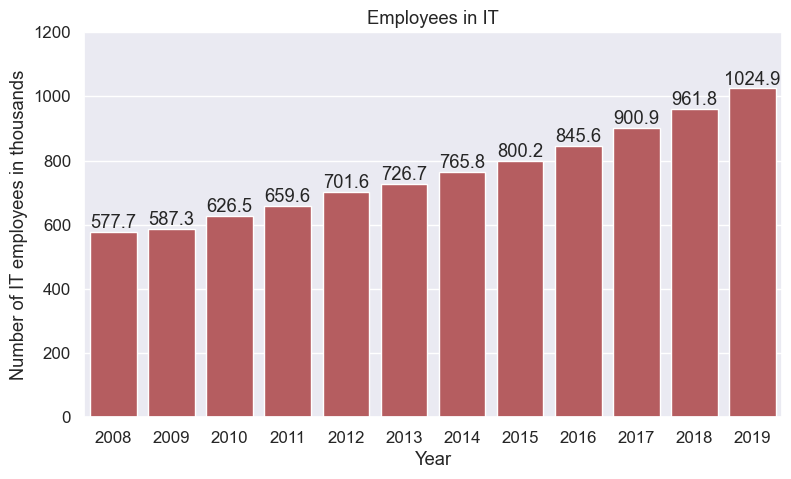

In [7]:
#график количество сотрудников, тыс/год
ax=sns.barplot(data=it_employment, x='year', y='num_of_employees_in_th', color='r')
ax.set(xlabel='Year', ylabel='Number of IT employees in thousands', 
      title='Employees in IT')
ax.bar_label(ax.containers[0])
ax.set(ylim=(0, 1200))

Для сравнения посмотрю общее количество трудоустроенных во всей Германии.

In [8]:
#количество трудоустроенных во всей Германии
germany_employment = pd.DataFrame({'year':list(range(2013, 2020)), 'num_of_employees_in_mil':[
    39.41, 39.77, 40.08, 41.07, 41.49, 41.77, 42.15]})

#рост в процентах по сравнению с предыдущим годом
germany_employment['change_in_proc'] = (germany_employment['num_of_employees_in_mil'].pct_change()*100).round(2)

germany_employment.set_index('year')

,num_of_employees_in_mil,change_in_proc
year,,
2013,39.41,NaN
2014,39.77,0.91
2015,40.08,0.78
2016,41.07,2.47
2017,41.49,1.02
2018,41.77,0.67
2019,42.15,0.91


In [9]:
print('Средний рост количества трудоустроенных в Германии в год:',  
      round(germany_employment['change_in_proc'].mean(), 2),"%")

Средний рост количества трудоустроенных в Германии в год: 1.13 %


[(0.0, 50.0)]

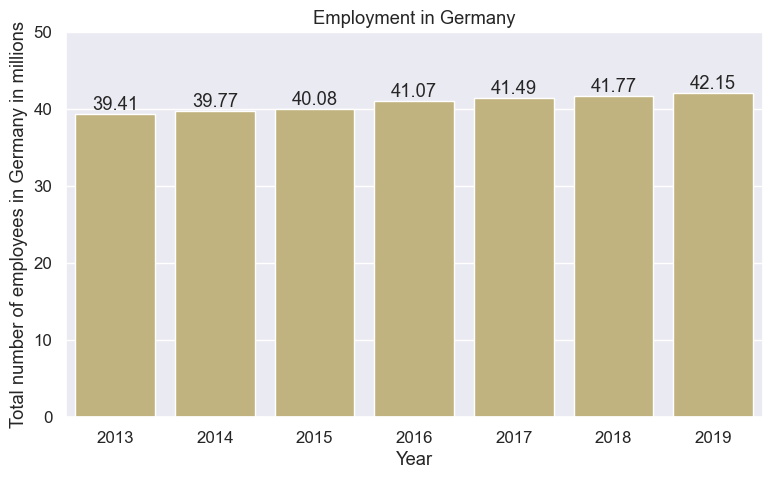

In [10]:
ax=sns.barplot(data=germany_employment, x='year', y='num_of_employees_in_mil', color='y')
ax.set(xlabel='Year', ylabel='Total number of employees in Germany in millions', 
       title='Employment in Germany')
ax.bar_label(ax.containers[0])
ax.set(ylim=(0, 50))

Построю графики роста количества трудоустроенных в IT и во всей Германии.

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'IT Revenue in Germany in millions USD'),
 Text(0.5, 1.0, 'Yearly increase in employment')]

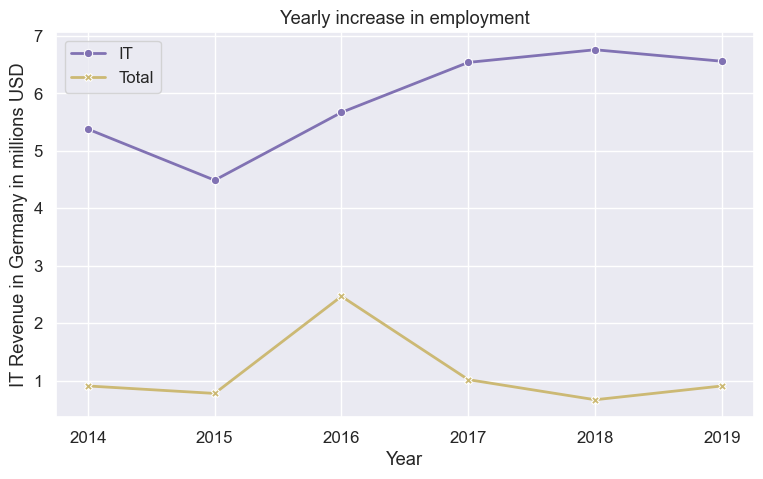

In [11]:
ax = sns.lineplot(data=it_employment[it_employment['year']>=2014], color="m", x='year', 
             y='change_in_proc', label='IT', marker='o', linewidth = 2)
sns.lineplot(data=germany_employment, color="y", x='year', y='change_in_proc', 
             marker='X', label='Total', linewidth = 2)
ax.set(xlabel='Year', ylabel='IT Revenue in Germany in millions USD', title='Yearly increase in employment')

### Выводы:

* в 2019 году 1 млн человек работали в IT в Германии
* Количество трудоустроенных в IT растет в среднем на 5% в год, в то время как средний рост во всей стране составляет 1%



## Объем IT-рынка

In [12]:
it_revenue_germany = pd.DataFrame({'year':list(range(2019, 2023)), 'revenue_in_mil_usd':[
    27.2, 28.6, 31, 33.7]})
#it_revenue_germany['change_in_proc'] = (it_revenue_germany['revenue_in_mil_usd'].pct_change()*100).round(2)

#it_revenue_germany.set_index('year')

[(0.0, 40.0)]

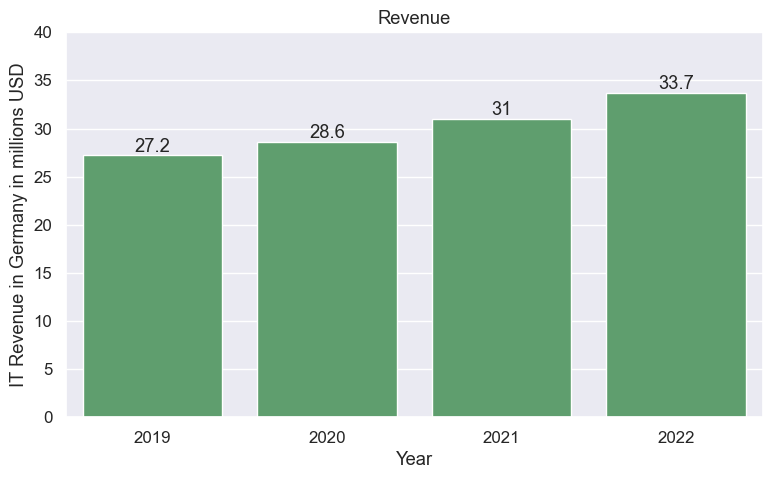

In [13]:
ax=sns.barplot(data=it_revenue_germany, x='year', y='revenue_in_mil_usd', color='g')
ax.set(xlabel='Year', ylabel='IT Revenue in Germany in millions USD', title='Revenue')
ax.bar_label(ax.containers[0])
ax.set(ylim=(0, 40))

### Выводы:
* по состоянию на 2022 год объем рынка составлят 33 миллиона долларов
* наблюдается рост рынка IT в Германии
* Германия лидер в Европе по обьему рынка (см источники)

## Зарплаты IT-специалистов 

In [14]:
#открытие таблицы с информацией о зп
path ='/Users/vzuga/Documents/jupyter/'

df = pd.read_csv(path+'/it_salary/IT_Salary_Survey_EU_2020.csv')

In [15]:
#название колонок с данными
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

Посмотрю уникальные значения в должностях.

In [16]:
#уникальные значения position, первые 30 штук
df['Position '].unique()[:30]

array(['Software Engineer', 'Backend Developer', 'Frontend Developer',
       'DevOps', 'Data Engineer', 'Designer (UI/UX)', 'Product Manager',
       'Mobile Developer', 'Software Architect', 'Team Lead',
       'Test manager', 'QA Engineer', 'Data Scientist',
       'Hardware Engineer', 'Engineering Manager', 'Analytics engineer',
       'Localization producer', 'Reporting Engineer', 'Account Managet',
       'agile master ', 'ML Engineer', 'Solution Architect',
       'BI Consultant', 'Fullstack Developer', nan, 'Cloud Architect',
       'System Administrator', 'Project Manager', 'Network Engineer ',
       'VP Engineering'], dtype=object)

Слишком много значений, посмотрю наиболее часто встречающиеся значения.

In [17]:
#количество уникальных значений position
df['Position '].value_counts().head(20)

Software Engineer      387
Backend Developer      174
Data Scientist         110
Frontend Developer      89
QA Engineer             71
DevOps                  57
Mobile Developer        53
ML Engineer             42
Product Manager         39
Data Engineer           25
Designer (UI/UX)        16
Engineering Manager     10
Data Analyst             8
CTO                      5
SRE                      4
Fullstack Developer      4
Project Manager          4
Software Architect       4
Team Lead                3
Hardware Engineer        3
Name: Position , dtype: int64

Выберу 5 наиболее распространенных должностей.

In [18]:
#отберу 5 распространенных позиций
frequent_positions = df['Position '].value_counts().head(5).index.values.tolist()
frequent_positions

['Software Engineer',
 'Backend Developer',
 'Data Scientist',
 'Frontend Developer',
 'QA Engineer']

Посмотрю и сделаю тоже самое с грейдами.

In [19]:
#10 самых распространенных грейдов
df['Seniority level'].value_counts().head(10)

Senior             565
Middle             366
Lead               166
Junior              79
Head                44
Principal            3
student              1
Intern               1
Entry level          1
Working Student      1
Name: Seniority level, dtype: int64

In [20]:
#Отберу 3 самых частых
frequent_levels = df['Seniority level'].value_counts().head(3).index.values.tolist()
frequent_levels

['Senior', 'Middle', 'Lead']

Посмотрю годовые зарплаты и бонусы.

In [21]:
#превью зарплат и бонусов
df[['Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR']].head()

,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR
0,80000.0,5000
1,80000.0,NaN
2,120000.0,120000
3,54000.0,NaN
4,62000.0,NaN


Видно, что в бонусах есть пропуски.

In [22]:
#количество пропусков в бонусах в процентах
df['Yearly bonus + stocks in EUR'].isna().mean()

0.3383878691141261

Первоначально я хотел суммировать зарплату и бонусы, так как иногда размер бонусов может быть близок к зарплате и на senior должностях бонусы являются существенным источником доходов. Но в бонусах пропущенно треть значений. Это слишком много. Необходимо или исследовать природу этих пропусков (возможно это ноль) или анализировать только зарплату без бонусов. 

В дальнейшем буду рассматривать только зарплату, без бонусов.

Посмотрю медианную зарплату в IT.

In [23]:
print('Медианная зарплата в IT в год:', df['Yearly brutto salary (without bonus and stocks) in EUR'].median())

Медианная зарплата в IT в год: 70000.0


Далее отфильтрую данные по самым распространенным профессиям и грейдам.

In [24]:
df_frequent = df.query("`Seniority level` in @frequent_levels and `Position ` in @frequent_positions")

Прежде чем смотреть зарплаты необходимо посмотреть распределение, если оно смещено, то тогда репрезентативнее будет медианная зарплата, а не средняя.

Построю распределение зарплат самых часто встречающихся категорий - старшего разработчика.

<AxesSubplot:title={'center':'Salary distribution'}, ylabel='Frequency'>

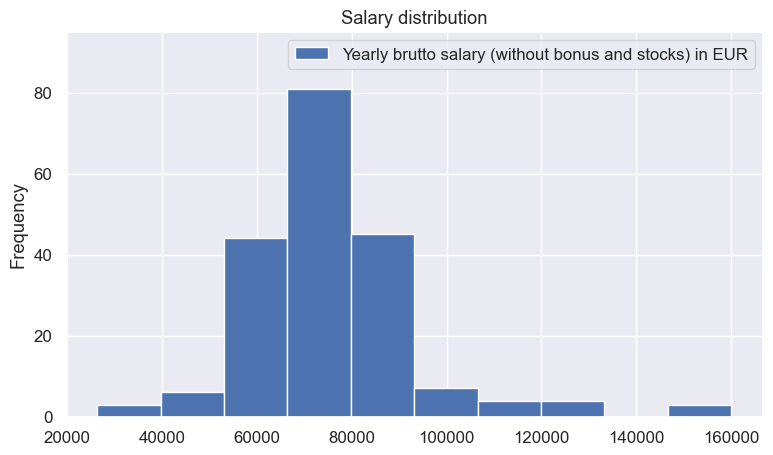

In [25]:
df_frequent.query(
    "`Position `=='Software Engineer' and `Seniority level`=='Senior'")[
    'Yearly brutto salary (without bonus and stocks) in EUR'].plot(
    bins=10, kind='hist', legend=True, ylim=(0, 95), title='Salary distribution')

Видно, что у распределения есть "хвост" в области высоких зарплат. Буду использовать медианное значение зарплаты.

Сгруппирую медианные зарплаты по позициям.

In [26]:
#grouped by position
df_frequent.groupby('Position ')[
    'Yearly brutto salary (without bonus and stocks) in EUR'].median().sort_values(ascending=False).reset_index()

,Position,Yearly brutto salary (without bonus and stocks) in EUR
0,Software Engineer,72750.0
1,Backend Developer,70000.0
2,Data Scientist,67000.0
3,Frontend Developer,66000.0
4,QA Engineer,60000.0


Построю сводную таблицу медианных зарплат в зависимости от должности и грейда.

In [27]:
df_frequent.pivot_table(index=['Position ', 'Seniority level'], 
                        values='Yearly brutto salary (without bonus and stocks) in EUR', 
                        aggfunc='median')

Yearly brutto salary (without bonus and stocks) in EUR
Position           Seniority level                                                        
Backend Developer  Lead                                                       86000.0     
                   Middle                                                     59000.0     
                   Senior                                                     72000.0     
Data Scientist     Lead                                                      100000.0     
                   Middle                                                     60000.0     
                   Senior                                                     77000.0     
Frontend Developer Lead                                                       80000.0     
                   Middle                                                     55000.0     
                   Senior                                                     71060.0     
QA Engineer        Lead                                                       73500.0     
                   Middle                                                     55250.0     
                   Senior                                                     63000.0     
Software Engineer  Lead                                                       90000.0     
                   Middle                                                     62500.0     
                   Senior                                                     74000.0

### Выводы:

* 5 самых распространенных позиций: software engineer, backend developer, data scientist, frontend developer, QA engineer
*  Медианная зарплата без бонусов составлят 70000 евро в год
* Зарплаты у разных позиций различаются, например разработчики в целом получают больше чем дата сайентисты, независимо от грейда.